In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
print("libraries imported successfully")


libraries imported successfully


In [2]:
data = pd.read_csv('C:\\Users\\yatee\\Downloads\\Amazon Sale Report.csv')

In [3]:
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
data['Month-Year'] = data['Date'].dt.to_period('M')

In [6]:
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS,Month-Year
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN,2022-04
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN,2022-04
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN,2022-04
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN,2022-04
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN,2022-04


In [7]:
monthly_sales = data.groupby('Category')['Amount'].sum().reset_index()

In [8]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Category', ylabel='Amount'>

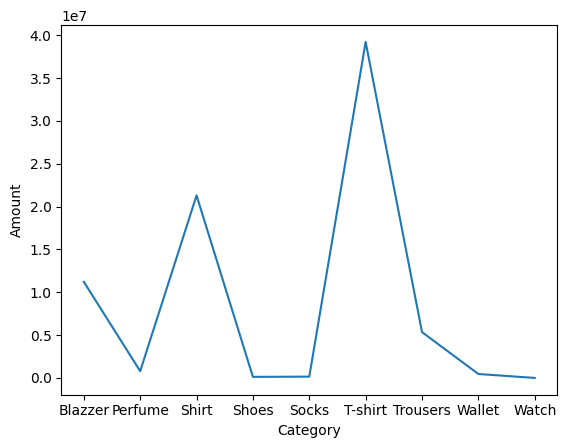

In [9]:
sns.lineplot(x='Category', y='Amount', data=monthly_sales)

Text(0.5, 1.0, 'Category')

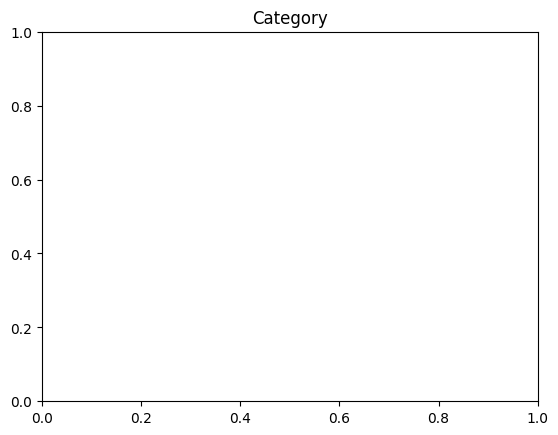

In [10]:
plt.title('Category')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

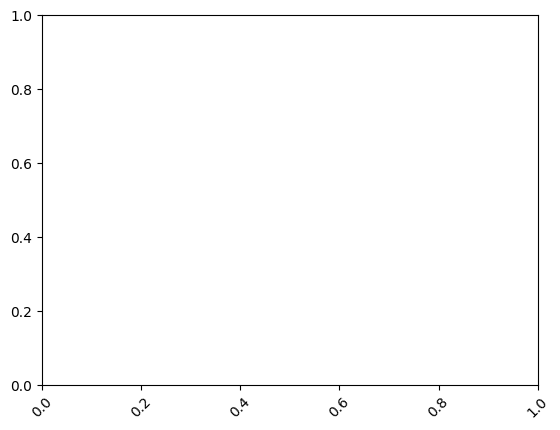

In [11]:
plt.xticks(rotation=45)

In [12]:
plt.show()

In [13]:
product_sales = data.groupby('Category')['Size'].sum().reset_index()

In [14]:
top_products = product_sales.sort_values(by='Size', ascending=False).head(10)

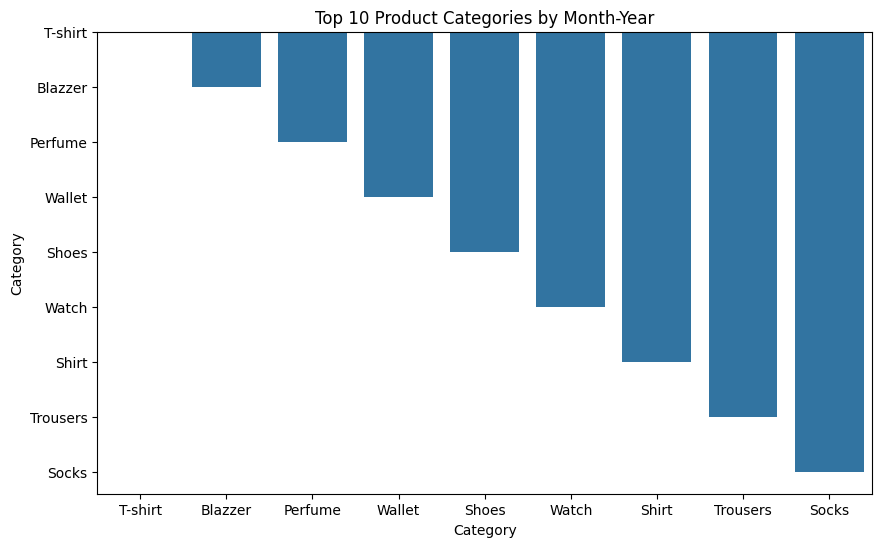

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Category', data=top_products)
plt.title('Top 10 Product Categories by Month-Year')
plt.show()

In [16]:
fulfillment_count = data['Fulfilment'].value_counts().reset_index()

In [17]:
fulfillment_count.columns = ['Fulfilment', 'count']

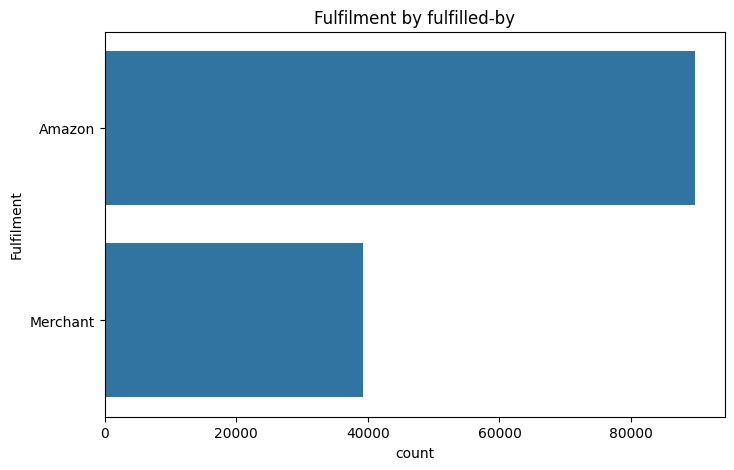

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(x='count', y='Fulfilment', data=fulfillment_count)
plt.title('Fulfilment by fulfilled-by')
plt.show()

In [19]:
data["Category"].unique()

array(['T-shirt', 'Shirt', 'Blazzer', 'Trousers', 'Perfume', 'Socks',
       'Shoes', 'Wallet', 'Watch'], dtype=object)

In [20]:
data["Category"].value_counts()

Category
T-shirt     50292
Shirt       49877
Blazzer     15500
Trousers    10616
Perfume      1157
Wallet        926
Socks         440
Shoes         165
Watch           3
Name: count, dtype: int64

In [21]:
data["Category"].value_counts().sum()

np.int64(128976)

In [22]:
data["Sales Channel"].unique()

array(['Amazon.in', 'Non-Amazon'], dtype=object)

In [23]:
data["ship-service-level"].unique()

array(['Standard', 'Expedited'], dtype=object)

In [24]:
data["Category"].unique()

array(['T-shirt', 'Shirt', 'Blazzer', 'Trousers', 'Perfume', 'Socks',
       'Shoes', 'Wallet', 'Watch'], dtype=object)

In [25]:
data["Size"].unique()

array(['S', '3XL', 'XL', 'L', 'XXL', 'XS', '6XL', 'M', '4XL', 'Free',
       '5XL'], dtype=object)

In [26]:
data["Courier Status"].unique()

array(['On the Way', 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [27]:
data["Amount"].unique()

array([ 647.62,  406.  ,  329.  , ...,  708.58, 1244.  ,  639.  ])

In [28]:
data["ship-city"].unique()
data["ship-state"].unique()
data["ship-postal-code"].unique()

array([400081., 560085., 410210., ..., 609603., 851205., 629152.])

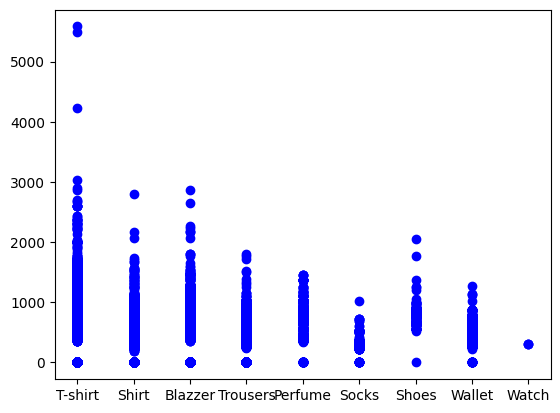

In [29]:
plt.scatter(data['Category'],data['Amount'],color='blue')

In [30]:
print(data.columns)

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS', 'Month-Year'],
      dtype='object')


In [31]:
state_sales = data.groupby('ship-state')['Amount'].sum().reset_index()

In [32]:
city_sales = data.groupby('ship-city')['Amount'].sum().reset_index()

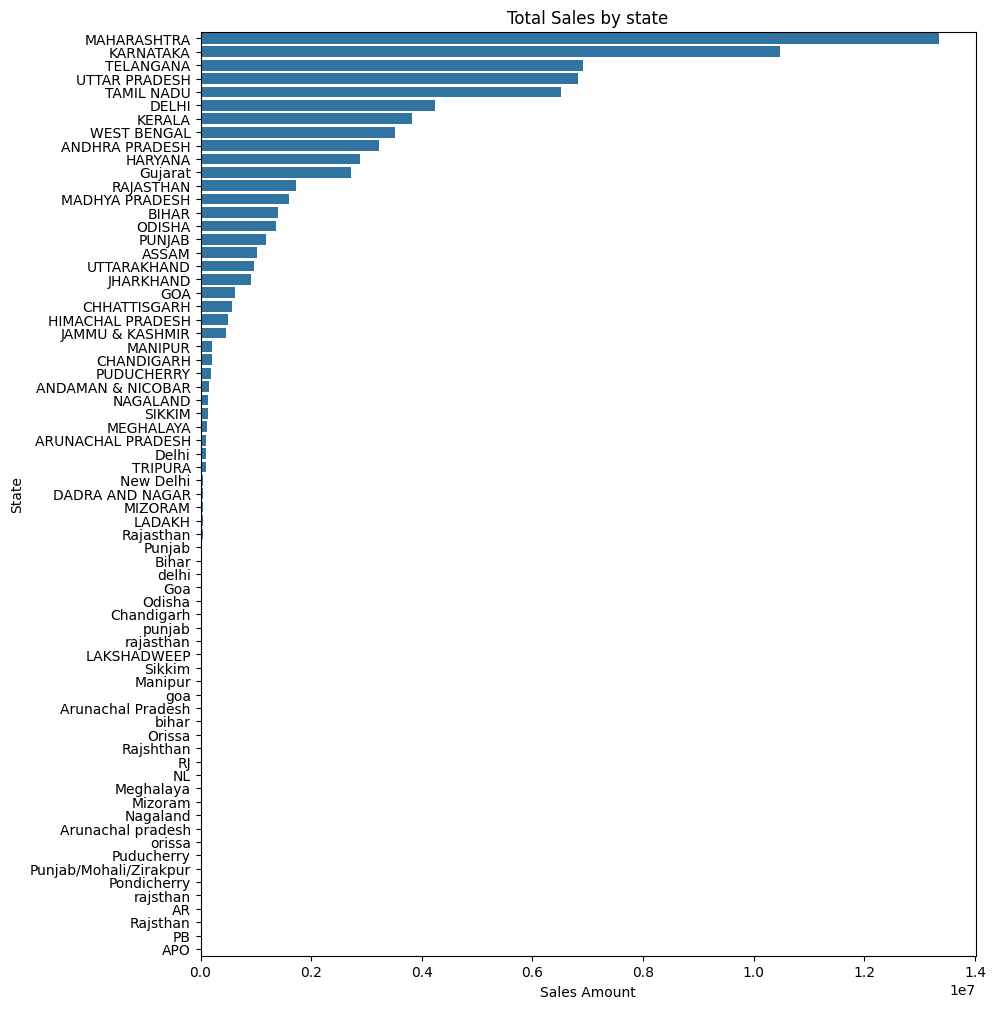

In [33]:
plt.figure(figsize=(10, 12))
sns.barplot(x='Amount', y='ship-state', data=state_sales.sort_values(by='Amount', ascending=False))
plt.title('Total Sales by state')
plt.xlabel('Sales Amount')
plt.ylabel('State')
plt.show()

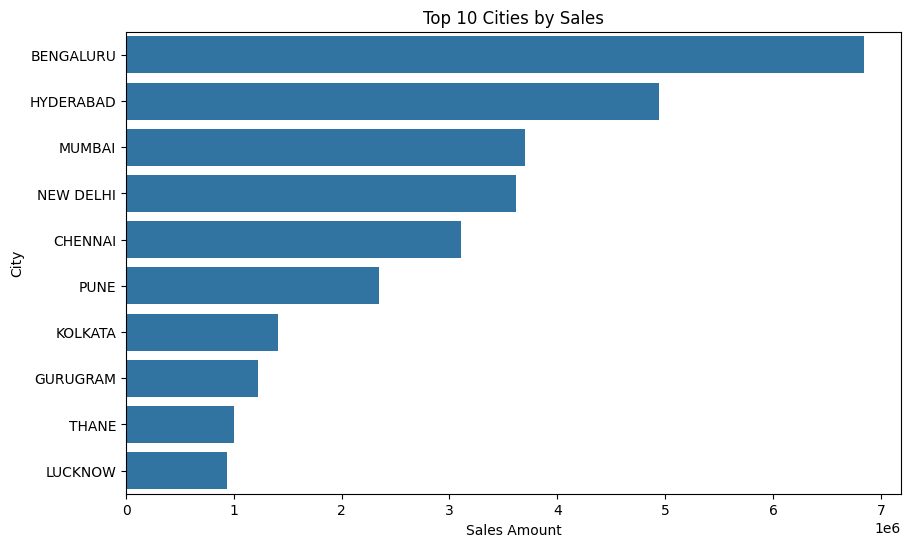

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Amount', y='ship-city', data=city_sales.sort_values(by='Amount', ascending=False).head(10))
plt.title('Top 10 Cities by Sales')
plt.xlabel('Sales Amount')
plt.ylabel('City')
plt.show()

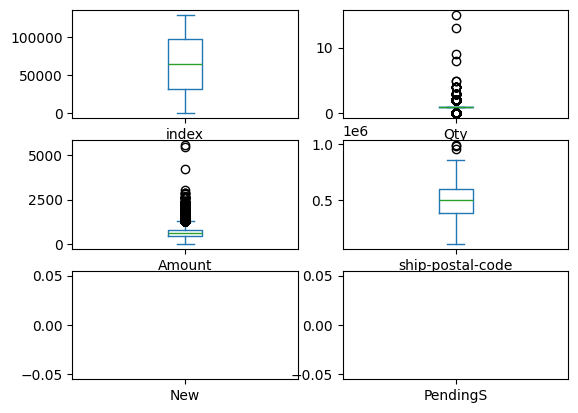

In [35]:
data.plot(kind='box',subplots=True,layout=(3,2),sharex=False,sharey=False)
plt.rcParams['figure.figsize']=[14,12]
plt.show()